In [1]:
import pandas as pd
import numpy as np

# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 복잡하고 정교한 시각화
import plotly.graph_objs as go
# 간단한 시각화
import plotly.express as px

from plotly.subplots import make_subplots

# 결측값 시각화 라이브러리
import missingno


from sklearn.preprocessing import LabelEncoder

# 생성한 그래프를 표시
%matplotlib inline

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [10]:
print(train.shape, test.shape)

(256351, 69) (90067, 68)


In [11]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

<Axes: >

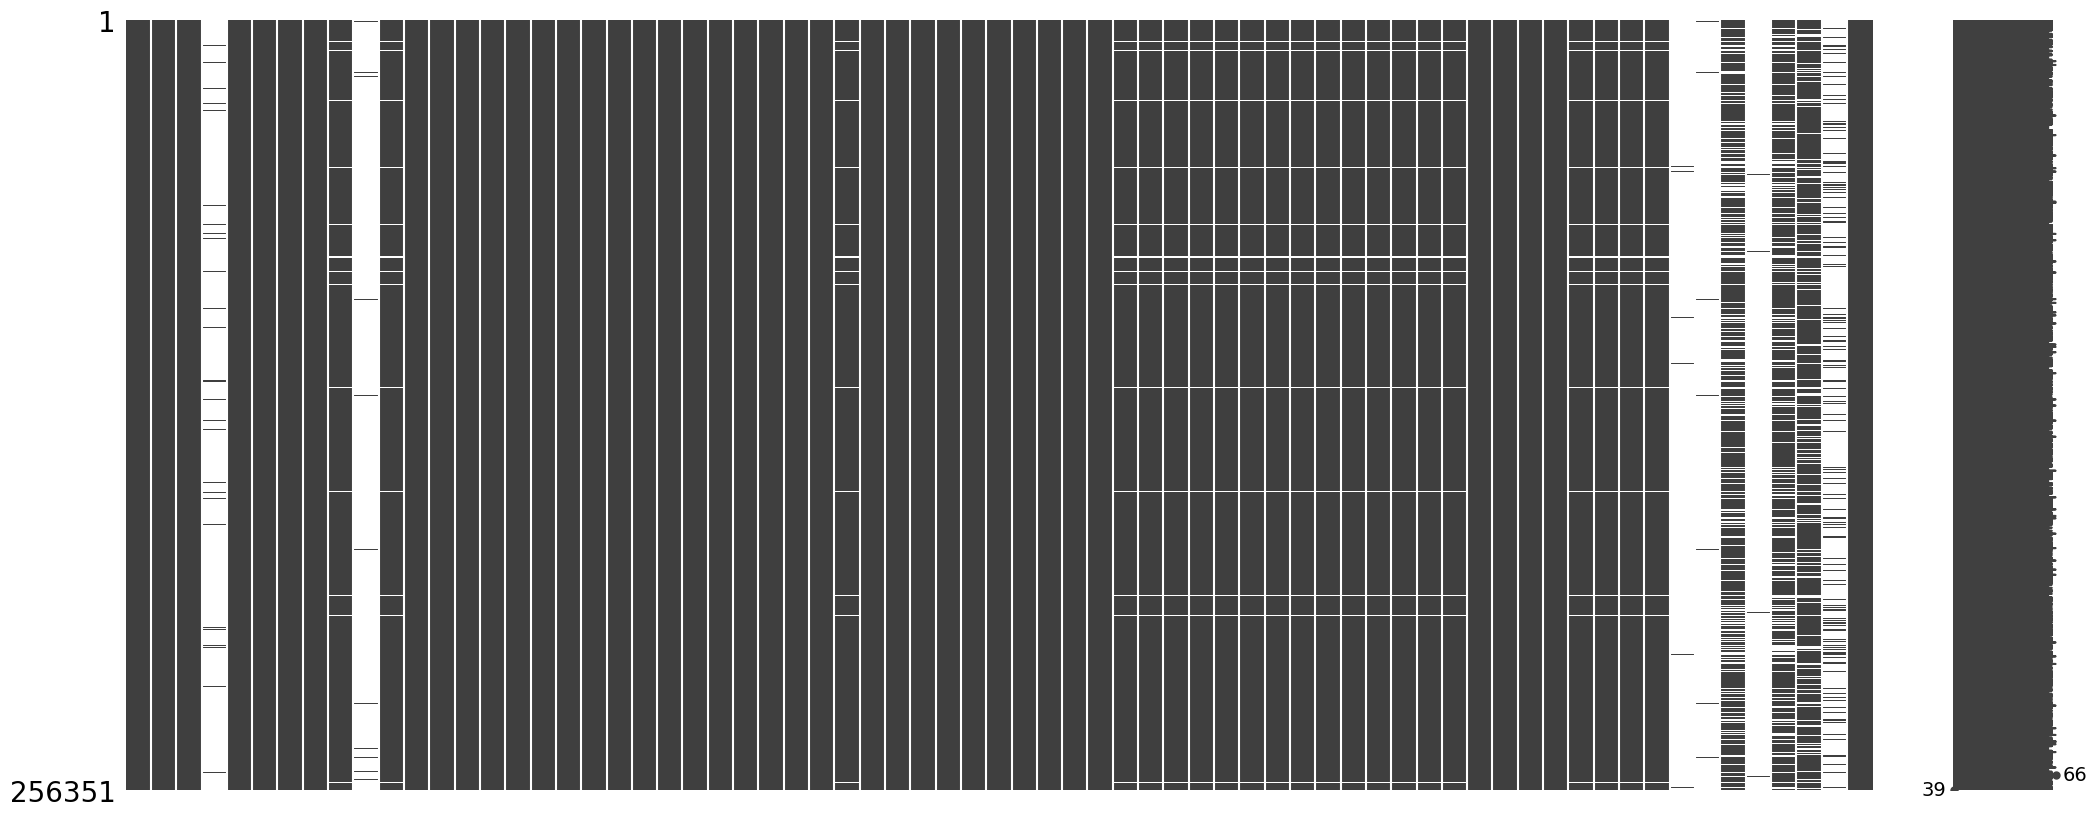

In [17]:
missingno.matrix(train)

## 칼럼 별 데이터 분석(결측치)

In [46]:
# 전체 중 임신 성공 비율 : 25.8%
train['임신 성공 여부'].value_counts(normalize=True)

임신 성공 여부
0    0.741651
1    0.258349
Name: proportion, dtype: float64

In [ ]:
# 6291개의 데이터는 전부 DI (기증받음), 성공률은 약 12.89 %
print(train['시술 유형'].value_counts())
print(train.loc[train['시술 유형'] == 'DI']['임신 성공 여부'].value_counts(normalize=True))

시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64
임신 성공 여부
0    0.871086
1    0.128914
Name: proportion, dtype: float64


In [62]:
# 단일 배아 이식 여부와 임신 성공 여부 비교 -> 최빈값으로 결측치 대체
print(train['단일 배아 이식 여부'].value_counts(normalize=True))
print(train.loc[train['단일 배아 이식 여부'] == 1]['단일 배아 이식 여부'].sum(), train.loc[train['단일 배아 이식 여부'] == 1]['임신 성공 여부'].sum())
print(train.loc[train['단일 배아 이식 여부'] == 1]['임신 성공 여부'].sum() / train.loc[train['단일 배아 이식 여부'] == 1]['단일 배아 이식 여부'].sum())

단일 배아 이식 여부
0.0    0.766524
1.0    0.233476
Name: proportion, dtype: float64
58383.0 21440
0.3672301868694654


In [63]:
# 사용 여부와 임신 성공 확률의 관계 적음. -> 결측치는 0으로 대체 혹은 아예 제거
print(train['착상 전 유전 검사 사용 여부'].value_counts(normalize=True))
print(train.loc[train['착상 전 유전 검사 사용 여부'] == 1]['착상 전 유전 검사 사용 여부'].sum(), train.loc[train['착상 전 유전 검사 사용 여부'] == 1]['임신 성공 여부'].sum())
print(train.loc[train['착상 전 유전 검사 사용 여부'] == 1]['임신 성공 여부'].sum() / train.loc[train['착상 전 유전 검사 사용 여부'] == 1]['착상 전 유전 검사 사용 여부'].sum())


착상 전 유전 검사 사용 여부
1.0    1.0
Name: proportion, dtype: float64
2718.0 403
0.14827078734363502


In [ ]:
# 15% 비율로 임신 성공 -> 유의미하지 않음 -> 결측치는 최빈값(0)으로 대체
print(train['착상 전 유전 진단 사용 여부'].value_counts(normalize=True))
print(train.loc[train['착상 전 유전 진단 사용 여부'] == 1]['착상 전 유전 진단 사용 여부'].sum(), train.loc[train['착상 전 유전 진단 사용 여부'] == 1]['임신 성공 여부'].sum())


착상 전 유전 진단 사용 여부
0.0    0.987219
1.0    0.012781
Name: proportion, dtype: float64
3196.0 614


In [39]:
# 결측치는 최빈값(현재 시술용)으로 대체
print(train['배아 생성 주요 이유'].value_counts(normalize=True))

배아 생성 주요 이유
현재 시술용                 0.934704
배아 저장용                 0.036759
기증용, 현재 시술용            0.015132
난자 저장용                 0.007834
기증용                    0.004431
기증용, 배아 저장용            0.000500
배아 저장용, 현재 시술용         0.000332
기증용, 난자 저장용            0.000176
기증용, 배아 저장용, 현재 시술용    0.000080
난자 저장용, 배아 저장용         0.000024
난자 저장용, 현재 시술용         0.000020
연구용, 현재 시술용            0.000004
난자 저장용, 배아 저장용, 연구용    0.000004
Name: proportion, dtype: float64
0 0


In [54]:
# 기증받은 사람(DI)은 배란을 안했으므로 최빈값(0)으로 대체
print(train[['총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수','미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수']].apply(lambda x: x.value_counts(normalize=True)))


      총 생성 배아 수  미세주입된 난자 수  미세주입에서 생성된 배아 수  이식된 배아 수  미세주입 배아 이식 수  \
0.0    0.213345    0.510553         0.526962  0.146141      0.554963   
1.0    0.060877    0.018144         0.039658  0.375074      0.185855   
2.0    0.076742    0.025170         0.050512  0.443274      0.238683   
3.0    0.083788    0.031640         0.055211  0.035511      0.020499   
4.0    0.086427    0.038479         0.055519       NaN           NaN   
5.0    0.081620    0.042466         0.051680       NaN           NaN   
6.0    0.074474    0.044289         0.046337       NaN           NaN   
7.0    0.064101    0.041634         0.038055       NaN           NaN   
8.0    0.054467    0.038787         0.031149       NaN           NaN   
9.0    0.044513    0.034416         0.024686       NaN           NaN   
10.0   0.036251    0.030985         0.019271       NaN           NaN   
11.0   0.028353    0.026106         0.014952       NaN           NaN   
12.0   0.022875    0.022483         0.011921       NaN          

In [55]:
print(train['동결 배아 사용 여부'].value_counts(normalize=True))

동결 배아 사용 여부
0.0    0.839535
1.0    0.160465
Name: proportion, dtype: float64


In [56]:
print(train['신선 배아 사용 여부'].value_counts(normalize=True))

신선 배아 사용 여부
1.0    0.840342
0.0    0.159658
Name: proportion, dtype: float64


In [ ]:
# print(train['기증 배아 사용 여부'].value_counts(normalize=True))
print(train['기증 배아 사용 여부'].value_counts())
print(df_new.value_counts())


기증 배아 사용 여부
0.0    247602
1.0      2458
Name: count, dtype: int64
기증 배아 사용 여부
0.0    253893
1.0      2458
Name: count, dtype: int64


In [58]:
print(train['대리모 여부'].value_counts(normalize=True))

대리모 여부
0.0    0.995805
1.0    0.004195
Name: proportion, dtype: float64


In [61]:
print(train['PGD 시술 여부'].value_counts(normalize=True))
print(train.loc[train['PGD 시술 여부'] == 1]['PGD 시술 여부'].sum(), train.loc[train['PGD 시술 여부'] == 1]['임신 성공 여부'].sum())

print(train['PGS 시술 여부'].value_counts(normalize=True))
print(train.loc[train['PGS 시술 여부'] == 1]['PGS 시술 여부'].sum(), train.loc[train['PGS 시술 여부'] == 1]['임신 성공 여부'].sum())


PGD 시술 여부
1.0    1.0
Name: proportion, dtype: float64
2179.0 609
PGS 시술 여부
1.0    1.0
Name: proportion, dtype: float64
1929.0 398


In [64]:
# 해당 컬럼 삭제
print(train['난자 채취 경과일'].value_counts(normalize=True))

난자 채취 경과일
0.0    1.0
Name: proportion, dtype: float64


In [66]:
# 최빈값(0)으로 대체
print(train['난자 해동 경과일'].value_counts(normalize=True))

난자 해동 경과일
0.0    0.998607
1.0    0.001393
Name: proportion, dtype: float64


In [67]:
print(train['난자 혼합 경과일'].value_counts(normalize=True))

난자 혼합 경과일
0.0    0.996565
1.0    0.002408
2.0    0.000503
3.0    0.000336
5.0    0.000118
6.0    0.000039
4.0    0.000025
7.0    0.000005
Name: proportion, dtype: float64


In [68]:
print(train['배아 이식 경과일'].value_counts(normalize=True))

배아 이식 경과일
5.0    0.382823
3.0    0.272218
2.0    0.164852
0.0    0.117038
1.0    0.028447
4.0    0.021167
6.0    0.013032
7.0    0.000423
Name: proportion, dtype: float64


In [ ]:
# DI 외 IVF도 결측치가 있음.
print(train.loc[train['배아 이식 경과일'].isna()]['시술 유형'].value_counts())
print(train.loc[(train['배아 이식 경과일'].isna()) & (train['시술 유형'] == 'IVF')]['임신 성공 여부'].value_counts())

시술 유형
IVF    37275
DI      6291
Name: count, dtype: int64
임신 성공 여부
0    37050
1      225
Name: count, dtype: int64



In [79]:
print(train['배아 해동 경과일'].value_counts(normalize=True))

배아 해동 경과일
0.0    0.985930
2.0    0.004508
3.0    0.004063
5.0    0.003468
1.0    0.000917
6.0    0.000743
4.0    0.000297
7.0    0.000074
Name: proportion, dtype: float64


In [91]:
# 각 컬럼별 최빈값으로 결측치 채움

df_new = train.apply(lambda x:x.fillna(x.mode()[0]))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  256351 non-null  float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256351 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            256351 non-null  float64
 9   착상 전 유전 검사 사용 여부       256351 non-null  float64
 10  착상 전 유전 진단 사용 여부       256351 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

## 수치형 변수 변환

수치형 변수 목록: ['임신 시도 또는 마지막 임신 경과 연수', '배란 자극 여부', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제', '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부', '난자 채취 경과일', '난자 해동 경과일', '난자 혼합 경과일', '배아 이식 경과일', '배아 해동 경과일', '임신 성공 여부']


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46608 (\N{HANGUL SYLLABLE DDO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

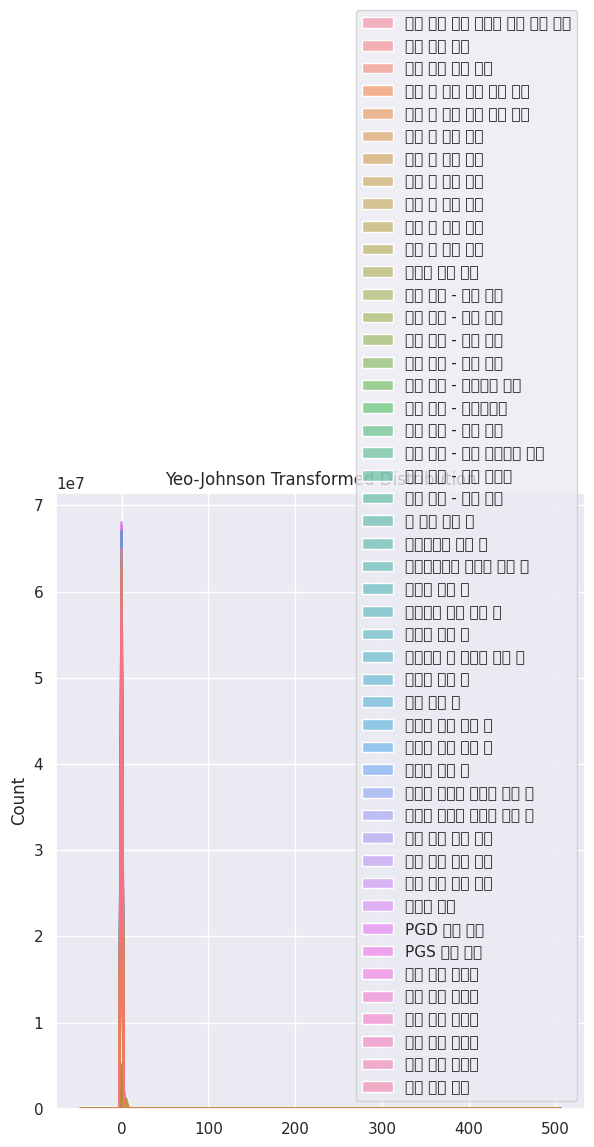

                  ID 시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  \
0       TRAIN_000000   TRZKPL  만18-34세              -0.077923   IVF     ICSI   
1       TRAIN_000001   TRYBLT  만45-50세              -0.077923   IVF     ICSI   
2       TRAIN_000002   TRVNRY  만18-34세              -0.077923   IVF      IVF   
3       TRAIN_000003   TRJXFG  만35-37세              -0.077923   IVF     ICSI   
4       TRAIN_000004   TRVNRY  만18-34세              -0.077923   IVF     ICSI   
...              ...      ...      ...                    ...   ...      ...   
256346  TRAIN_256346   TRYBLT  만18-34세              -0.077923   IVF     ICSI   
256347  TRAIN_256347   TRYBLT  만38-39세              -0.077923   IVF     ICSI   
256348  TRAIN_256348   TRVNRY  만35-37세              -0.077923   IVF     ICSI   
256349  TRAIN_256349   TRZKPL  만38-39세              -0.077923   IVF     ICSI   
256350  TRAIN_256350   TRXQMD  만35-37세              -0.077923   IVF      IVF   

        배란 자극 여부    배란 유도 유형  단일 배아 이식 

In [32]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

df = train.apply(lambda x:x.fillna(x.mode()[0]))

numeric_cols = df.select_dtypes(include=[np.number]).columns
print("수치형 변수 목록:", numeric_cols.tolist())

# Yeo–Johnson 변환: sklearn의 PowerTransformer (method='yeo-johnson')
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

# 변환 후 데이터 분포 시각화
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_cols], bins=10, kde=True)
plt.title("Yeo-Johnson Transformed Distribution")
plt.show()

print(df)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  256351 non-null  float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256351 non-null  object 
 6   배란 자극 여부               256351 non-null  float64
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            256351 non-null  float64
 9   착상 전 유전 검사 사용 여부       256351 non-null  float64
 10  착상 전 유전 진단 사용 여부       256351 non-null  float64
 11  남성 주 불임 원인             256351 non-null  float64
 12  남성 부 불임 원인             256351 non-null  float64
 13  여성 주 불임 원인             256351 non-null  float64
 14  여성 부 불임 원인             256351 non-nu

## 히트맵 분포

<Axes: xlabel='시술 당시 나이', ylabel='count'>

/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) miss

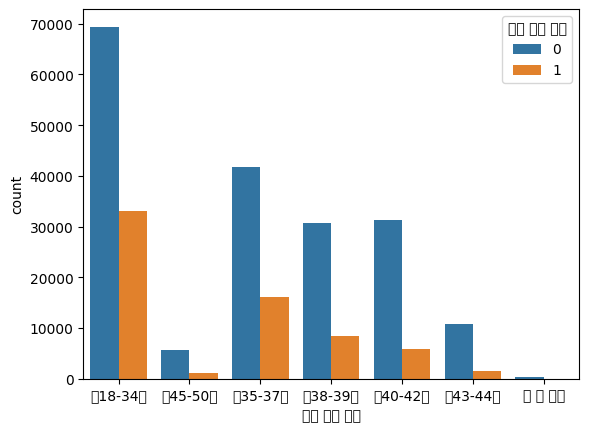

In [4]:
sns.countplot(x='시술 당시 나이', hue='임신 성공 여부', data=train)
